# Description:

The data consists of Marks of students including their study time & number of courses. The dataset is downloaded from UCI Machine Learning Repository.

Properties of the Dataset: \
Number of Instances: 100\
Number of Attributes: 3 including the target variable.

The project is simple yet challenging as it is has very limited features & samples. Can you build regression model to capture all the patterns in the dataset, also maitaining the generalisability of the model?

# Objective:

Understand the Dataset & cleanup (if required).
Build Regression models to predict the student marks wrt multiple features.
Also evaluate the models & compare their respective scores like R2, RMSE, etc.

In [31]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

In [32]:
# load dataset
md = pd.read_csv('Student_marks.csv')

In [33]:
md

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [35]:
# highest mark
md['Marks'].max()

55.299

In [36]:
md[['Marks', 'time_study', 'number_courses']]

,Marks,time_study,number_courses
0,19.202,4.508,3
1,7.734,0.096,4
2,13.811,3.133,4
3,53.018,7.909,6
4,55.299,7.811,8
...,...,...,...
95,19.128,3.561,6
96,5.609,0.301,3
97,41.444,7.163,4
98,12.027,0.309,7


In [55]:
# Independent and Dependent variables
X = md.iloc[:, :-1]
y = md.iloc[:, -1]

# Multiple Linear Regression

In [58]:
# Function for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 8
    height = 8
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(RedFunction, hist=False, color='r', label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color='b', label=BlueName, ax=ax1)
    plt.legend(labels=['Actual', 'Prediction'])
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    
    plt.show()
    plt.close()

In [59]:
# checking correlation
md.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


<AxesSubplot:>

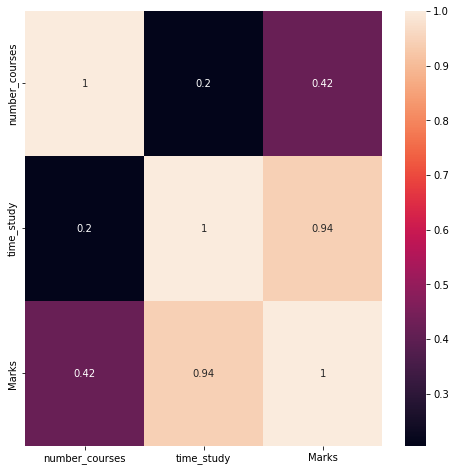

In [62]:
plt.figure(figsize=(8,8))
sns.heatmap(md.corr(), annot= True)

<AxesSubplot:xlabel='Marks', ylabel='time_study'>

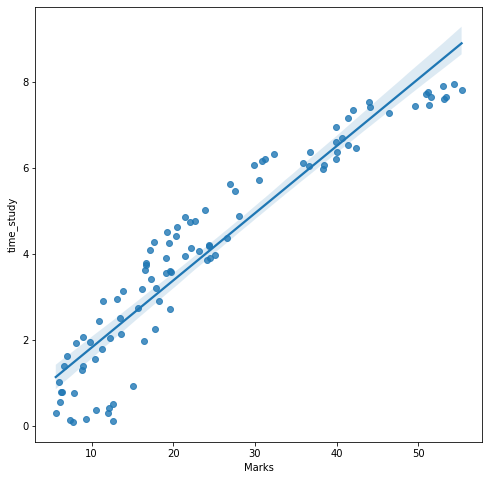

In [65]:
# Type of correlations with student marks
plt.figure(figsize=(8,8))
sns.regplot(x=md.Marks, y=md.time_study)

<AxesSubplot:xlabel='Marks', ylabel='number_courses'>

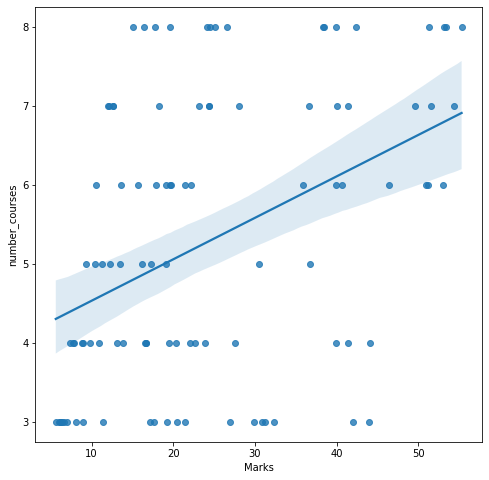

In [66]:
plt.figure(figsize=(8,8))
sns.regplot(x=md.Marks, y=md.number_courses)

# Multiple Linear Regression Model Training

In [67]:
lr = LinearRegression()

x = md[["number_courses", "time_study"]]
y = md["Marks"]

x_train, x_test, y_train, y_test =  train_test_split(x ,y , test_size= 0.2, random_state= 0)

In [68]:
lr.fit(x_train, y_train)
print(f"Accuracy: {round(lr.score(x_test, y_test) * 100, 2)} %")

Accuracy: 93.79 %


In [69]:
yhat = lr.predict(x_test)

# Graphing Actual vs Prediction For Multiple Linear Regression

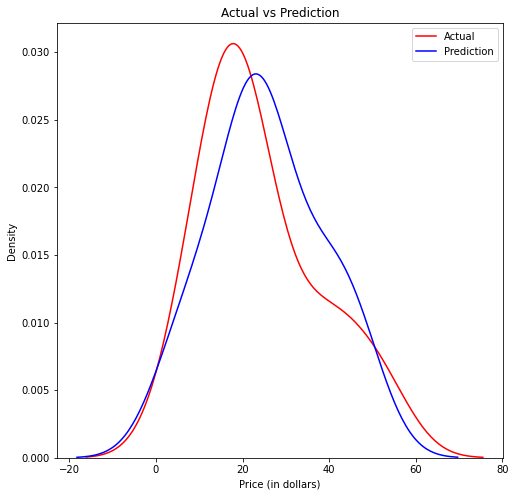

In [70]:
DistributionPlot(y_test, yhat, "Actual", "Prediction", "Actual vs Prediction")

# Polynomial Regression Model Training

In [71]:
pr = PolynomialFeatures(degree=5)

x_train_pr = pr.fit_transform(x_train)

x_test_pr = pr.fit_transform(x_test)

poly = LinearRegression()

poly.fit(x_train_pr, y_train)

yhat = poly.predict(x_test_pr)

print("Predicted values:", yhat[0:4])

print("True values:", y_test[0:4].values)

print(f"Accuracy: {round(poly.score(x_test_pr, y_test) * 100, 2)} %")

Predicted values: [12.31564747 23.59712272 13.85497489 18.07749707]
True values: [12.647 23.149 13.811 18.238]
Accuracy: 99.95 %


# Graphing Actual vs Prediction For Polynomial Linear Regression

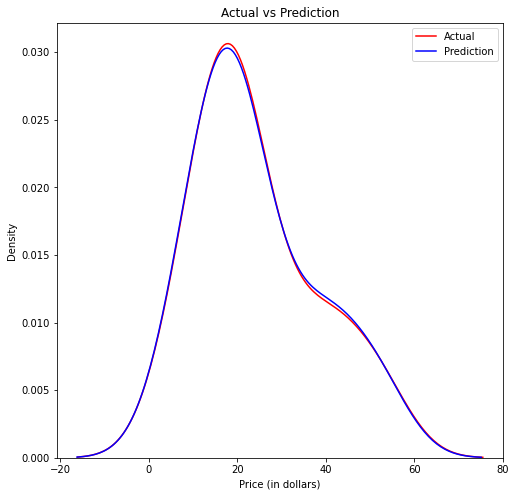

In [72]:
DistributionPlot(y_test, yhat, "Actual", "Prediction", "Actual vs Prediction")